# Advanced Visualisation with ggplot2

* Author: Johannes Maucher, some modifications by OK in 2019
* Last Update: 2017-05-12
* References:
    * [R in Action, Chapter 19](https://livebook.manning.com/#!/book/r-in-action-second-edition/chapter-19/) [KR15]
    * [R for Data Science, Chapter 3](https://r4ds.had.co.nz/data-visualisation.html#introduction-1) [WH19]
    * [ggplot2 Reference Guide](http://ggplot2.tidyverse.org/reference/).



## Concept of ggplot2

Basic visualisation functions are included in the R base package and need not be explicitly loaded. There are several other R packages around, which extend the capabilities of R's base visualisation package. Maybe the most important of these packages is [`ggplot2`](https://ggplot2.tidyverse.org/reference/index.html). This package is not contained in the base installation and it must be explicitly loaded to be used in a R script. The `ggplot2` package provides a comprehensive, grammar-based system for generating graphs in a unified and coherent manner. 

Install and load ggplot2:

In [1]:
#install.packages("ggplot2")
#library(ggplot2)

#or 
library(tidyverse)
library(IRdisplay) #Loading interface to the rich display capabilities 

#Resize graphics
options(repr.plot.res = 80, repr.plot.height=6, repr.plot.width=7)  #Defaults:resolution=120,width/height=7


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


<a id="mainconcepts"></a>

**The main concept of ggplot2's grammer is:**
1. First a plot is initialized by the [**ggplot()-function**](https://ggplot2.tidyverse.org/reference/ggplot.html). The arguments of this function specify the data source and optionally the variables, which shall be used. However, this function does not plot any line or point, it just initializes an empty plot. For example **ggplot(data=facebookData)** initializes a plot, in which variables of the dataframe *facebookData* can be plotted.


2. After the initialization one or more geometric objects can be added by a **+** symbol. These objects are added by so called **geom functions** or just **geoms**. There exist geom functions for a vast variety of different plots, e.g. scatter-plots, line-graphs, box-plots, bar-plots, histograms, etc. For example 

        ggplot(data=facebookData)+ 
            geom_point(mapping=aes(x=impressions, y=clicks)) 

    first initializes an empty plot and then adds a scatter-plot in which the variable *impressions* is assigned to the x- and the variable *clicks* is assigned to the y-coordinate of the points. Both, *impressions* and *clicks* are columns of the dataframe *facebookData*. The aesthetic mappings, defined by [`mapping=aes()`](https://ggplot2.tidyverse.org/reference/aes.html), tell how variables from the data are mapped to visual properties (aesthetics) of geoms.


3. The general ggplot2 grammer for a basic template from which a comprehensive bunch of graphics can be derived is:

        ggplot(data = <DATA>) + 
          <GEOM_FUNCTION>(
             mapping = aes(<MAPPINGS>),
             stat = <STAT>, 
             position = <POSITION>
          ) +
          <COORDINATE_FUNCTION> +
          <FACET_FUNCTION>

    This template takes seven parameters, but not all of them must be configured by the user. See next.

Only the parameters &lt;DATA&gt;, &lt;GEOM_FUNCTION&gt; and &lt;MAPPINGS&gt; must be explicitely assigned. The others are already assigned by useful defaults and must only be configured, if non-default functionality is required. Note that ggplot2 provides much more than these seven parameters. An overview of parameters and their values is given e.g. in the [ggplot2 Reference](http://ggplot2.tidyverse.org/reference/index.html). The 7 parameters of our basic template above are described and applied in this notebook.
      

Let's take a look at the **ggplot workflow** from the book [R for Data Science](https://r4ds.had.co.nz/data-visualisation.html#the-layered-grammar-of-graphics):

<html><img src="../img/ggplot-wrk1.jpg", width=700></html>


<html><img src="../img/ggplot-wrk2.jpg", width=700></html>


<html><img src="../img/ggplot-wrk3.jpg", width=900></html>

## Geometric Functions

As already mentioned, one or more **geometric functions (geoms)** can be attached to a plot (see [ggplot2 Reference](http://ggplot2.tidyverse.org/reference/index.html)). 

Let's take a look to the [Plotly ggplot2 Library](https://plot.ly/ggplot2/) where we can see examples and an interactive tool. See also [`ggplot2 cheat sheet`](https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf).



The most important geoms are: 

| geometric function 	| Comment         	|
|:--------------------:	|:-----------------:|
| [geom_bar()](https://ggplot2.tidyverse.org/reference/geom_bar.html)         	| Bar chart       	|   	
| [geom_line()](https://ggplot2.tidyverse.org/reference/geom_path.html)        	| Line graph       
| [geom_boxplot()](https://ggplot2.tidyverse.org/reference/geom_boxplot.html)     	| Box plot        	|       
| [geom_point()](https://ggplot2.tidyverse.org/reference/geom_point.html)       	| Scatter plot     
| [geom_density()](https://ggplot2.tidyverse.org/reference/geom_density.html)     	| Density plot    	|   	
| [geom_rug()](https://ggplot2.tidyverse.org/reference/geom_rug.html)         	| Rug plot         
| [geom_histogram()](https://ggplot2.tidyverse.org/reference/geom_histogram.html)   	| Histogram       	|   	
| [geom_smooth()](https://ggplot2.tidyverse.org/reference/geom_smooth.html)      	| Fitted line      
| [geom_hline()](https://ggplot2.tidyverse.org/reference/geom_abline.html)       	| Horizontal line 	|   	
| [geom_text()](https://ggplot2.tidyverse.org/reference/geom_text.html)        	| Text annotations 
| [geom_jitter()](https://ggplot2.tidyverse.org/reference/geom_jitter.html)      	| Jittered points 	|   	
| [geom_violine()](https://ggplot2.tidyverse.org/reference/geom_violin.html)     	| Violin plot      
| [geom_vline()](https://ggplot2.tidyverse.org/reference/geom_abline.html)       	| Vertical line    	|
| [geom_abline()](https://ggplot2.tidyverse.org/reference/geom_abline.html)       	| diagonal line (specified by slope and intercept)    	|



Each of the geometric functions is typically specified by a set of **options**. A set of common options is specified in the table below. Not all options are applicable to all geometric functions. The application of these functions is demonstrated in this notebook.

|  option  	| Comment                                                                                                                                                                                                                                                                                               	|
|:--------:	|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| color    	| Color of points, lines, and borders around filled regions                                                                                                                                                                                                                                             	|
| fill     	| Color of filled areas such as bars and density regions                                                                                                                                                                                                                                                 	|
| alpha    	| Transparencyof colors, ranging from 0 (fully transparent) to 1 (opaque)                                                                                                                                                                                                                               	|
| linetype 	| Pattern for lines (1 = solid, 2 = dashed, 3 = dotted, 4 = dotdash, 5 = longdash, 6 = twodash)                                                                                                                                                                                                         	|
| size     	| Point size and line width                                                                                                                                                                                                                                                                             	|
| shape    	| Point shapes (same as pch, with 0 = open square, 1 = open circle, 2 = open triangle, and so on)                                                                                                                                                                                                       	|
| position 	| Position of plotted objects such as bars and points. For bars, "dodge" places grouped bar charts side by side, "stacked" vertically stacks grouped bar charts, and "fill" vertically stacks grouped bar charts and standardizes their heights to be equal. For points, "jitter" reduces point overlap 	|
| binwidth 	| Bin width for histograms                                                                                                                                                                                                                                                                              	|
| notch    	| Indicates whether box plots should be notched (TRUE/FALSE).                                                                                                                                                                                                                                           	|
| sides    	| Placement of rug plots on the graph ("b" = bottom, "l" = left, "t" = top, "r" = right, "bl" = both bottom and left, and so on)                                                                                                                                                                        	|
| width    	| Width of box plots                                                                                                                                                                                                                                                                                    	|

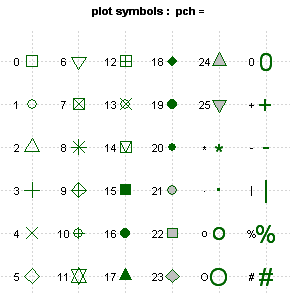

In [2]:
#### 'shape' corresponds to the table of 'pch' in R base package, also 'color'

display_png(file="../img/RgraphMarkers.PNG")


## Facebook Ad Camaign Data

According to the aboved discussion of the Customer Journey Analysis we want to visualize the data from [Facebook Ad Campaign on Kaggle](https://www.kaggle.com/madislemsalu/facebook-ad-campaign). This dataset contains data from different Facebook marketing campaigns. Some data fields with description if necessary:

* 'ad_id'
* 'reporting_start'
* 'reporting_end'
* 'campaign_id'
* 'fb_campaign_id'
* 'age'
* 'gender'
* 'interest1': anonymous interest1
* 'interest2': anonymous interest2
* 'interest3': anonymous interest3
* 'impressions': impressions of ad
* 'clicks': number of clicks on ad
* 'spent': cost of ad in Facebook
* 'total_conversion': shows the total number of signups or installs for instance
* 'approved_conversion': tells how many became actual active users


In [3]:
facebookData <- read.csv(file="../data/facebook-ad-campaign.csv", header=TRUE,
                         sep=",", dec=".")

facebookData <- facebookData %>% drop_na()

glimpse(facebookData)

Observations: 761
Variables: 15
$ ad_id               <int> 708746, 708749, 708771, 708815, 708818, 708820,...
$ reporting_start     <fct> 17/08/2017, 17/08/2017, 17/08/2017, 30/08/2017,...
$ reporting_end       <fct> 17/08/2017, 17/08/2017, 17/08/2017, 30/08/2017,...
$ campaign_id         <fct> 916, 916, 916, 916, 916, 916, 916, 916, 916, 91...
$ fb_campaign_id      <fct> 103916, 103917, 103920, 103928, 103928, 103929,...
$ age                 <fct> 30-34, 30-34, 30-34, 30-34, 30-34, 30-34, 30-34...
$ gender              <fct> M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, M,...
$ interest1           <int> 15, 16, 20, 28, 28, 29, 15, 16, 27, 28, 31, 7, ...
$ interest2           <int> 17, 19, 25, 32, 33, 30, 16, 20, 31, 32, 37, 8, ...
$ interest3           <int> 17, 21, 22, 32, 32, 30, 17, 18, 31, 31, 34, 8, ...
$ impressions         <dbl> 7350, 17861, 693, 4259, 4133, 1915, 15615, 1095...
$ clicks              <int> 1, 2, 0, 1, 1, 0, 3, 1, 1, 3, 0, 0, 0, 0, 7, 0,...
$ spent             

In [4]:
summary(facebookData)

     ad_id           reporting_start    reporting_end campaign_id
 Min.   : 708746   23/08/2017: 85    23/08/2017: 85   1178 :243  
 1st Qu.: 748086   21/08/2017: 80    21/08/2017: 80   30-34:  0  
 Median : 781175   19/08/2017: 73    19/08/2017: 73   35-39:  0  
 Mean   : 895639   22/08/2017: 73    22/08/2017: 73   40-44:  0  
 3rd Qu.:1121184   18/08/2017: 70    18/08/2017: 70   45-49:  0  
 Max.   :1121593   20/08/2017: 65    20/08/2017: 65   916  : 54  
                   (Other)   :315    (Other)   :315   936  :464  
 fb_campaign_id      age          gender      interest1       interest2    
 144536 :  6    30-34  :327   M      :486   Min.   : 2.00   Min.   : 3.00  
 144562 :  6    35-39  :180   F      :275   1st Qu.:16.00   1st Qu.:19.00  
 144599 :  6    40-44  :139   10     :  0   Median :22.00   Median :26.00  
 144611 :  6    45-49  :115   102    :  0   Mean   :25.47   Mean   :28.98  
 144531 :  5    10     :  0   103    :  0   3rd Qu.:29.00   3rd Qu.:33.00  
 144532 :  5    

## Applying ggplot2() geometric functions


### Scatter Plots
Scatter plots are one of the most used techniques for visualizing 2-dimensional data. In ggplot2 scatter plots are generated by the geometric function [`geom_point()`](https://ggplot2.tidyverse.org/reference/geom_point.html) as shown below. In the first row the plot is initialzied. In the second row the scatter plot is attached to the initialized plot-object. Within the *aes()*-function, which is assigned to the *mapping*-argument, the data assigned to the x- and y-axis is defined. Further arguments can be specified for the color, size and type of the markers. 


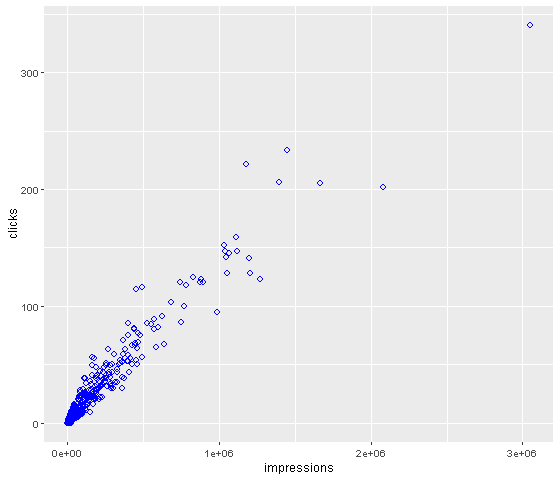

In [5]:

ggplot(data=facebookData)+
    geom_point(mapping=aes(x=impressions, y=clicks), 
               color="blue", size=2, shape=1)

The scatter plot above shows (also the summary output above), that there are some outliers, i.e. campaign ad's with a much larger 'impressions' and 'clicks' than all others. In a scatter plot such outliers cause that the variations within the set of non-outliers appear vanishing. In order to avoid this the entire data set is often partitioned into a non-outlier- and an outlier-part. In all of the following visualizations of *facebookData* only the subset of non-outliers is regarded. This subset is assigned to *facebookDataRed* and can be extracted from the entire *facebookData* set, by applying a filter rule on the 'impressions' attribute. 

`Keep in mind`: We will discuss in the upcoming lecture "Feature Engineering" a more professional method to detect outliers. Here is the focus in visualisation.

In [6]:
facebookDataRed <- facebookData %>% filter(impressions < 120000) %>% 
                                    filter(spent < 100, spent > 0)


The scatter plot below contains only the non-outliers. Moreover, since the plot above already indicates that the 'impressions' increases with increasing the 'spent', a linear regression line is plotted in addition to the datapoints. 

Regression lines like this can easily be plotted by [`geom_smooth()`](https://ggplot2.tidyverse.org/reference/geom_smooth.html). The grey zone around the line is by default the 95% confidence level interval for predictions from a linear model. We can change this by 'level' argument, e.g. 'level=0.90'.

`Discussion`: What are the patterns in the range of 'clicks'-values smaller than 8?

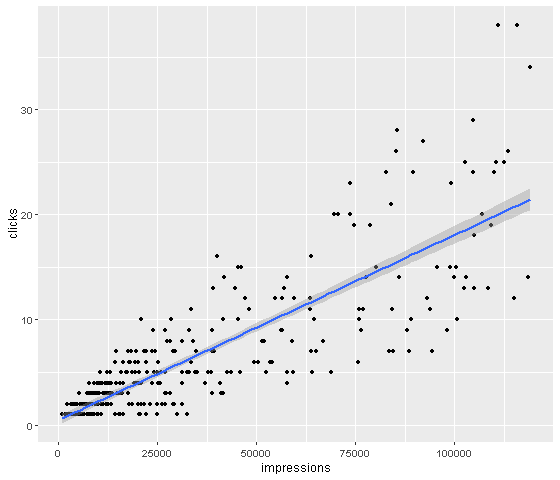

In [7]:
ggplot(data=facebookDataRed) +
    geom_point(mapping=aes(x=impressions, y=clicks)) +
    geom_smooth(mapping=aes(x=impressions, y=clicks), method='lm')


Since some points have a high deviation from the regression line, it is clear that 'clicks' does not only depend on the 'impressions', but on other influences. We expect that 'gender' and a high rate of 'spent' also influences the 'clicks'. This hypothesis can be verified e.g. by visualizing the 'gender'- and 'spent'-part of the Facebook ad campaigns by size and color, respectively.   

The 'alpha'-value shows us a superimposition of values by a more intense color.

The plot below verifies this hypothesis - `why?`




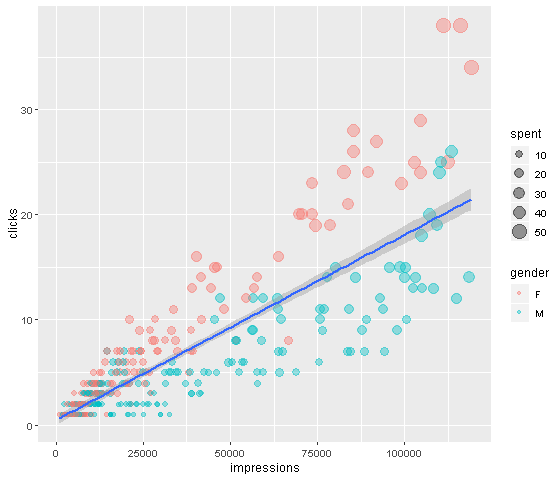

In [35]:

ggplot(data=facebookDataRed) +
    geom_point(mapping=aes(x=impressions, y=clicks, size=spent, color=gender) , alpha=.4) +
    geom_smooth(mapping=aes(x=impressions, y=clicks), method='lm')
 


`Keep in mind`: Above you see that the data definition in 'ggplot()' is set global for all following geom functions. In the 'geom_point()' we see definitions of 'mapping=aes()' and an 'size'- and 'color'-value which are set inside the 'mapping' and are therefore influenced by the data itself depending on the data variables. A fixed size and color can be defined outside the 'mapping' brackets. 

#### Helpful additionally created data fields

For some better visualisations we bin the data of 'spent' into different categories. 

We will also discuss in the upcoming lecture "Feature Engineering" a more professional way. Here is the focus in visualisation.

In [9]:
####### Binning

#By hand
NumberOfClasses <- 6 # for quantile adaptive width 
# (quartiles divide into quarters, deciles into tenths a.s.o.)
bin.classes <- quantile(facebookDataRed$spent, 
                        prob = seq(0, 1, length = NumberOfClasses))
cat("Created bins with ranges of values: \n")
bin.classes

valInBins <- cut(facebookDataRed$spent, breaks = bin.classes) 
#cat("Show the first 10 according bins of the values: \n")
#valInBins[1:10]
#class(valInBins)

valInBinsFreq <- table(valInBins)
cat("Frequencies of values in the bins: \n")
valInBinsFreq
       
#create to names for the bins
tLen = NumberOfClasses
strBin <- character(tLen)
for (i in 1:tLen) {
    strBin[i] <- str_c( paste("spentCat-", round(bin.classes[i+1], 2), sep=""))
}
#Can get not assign +1 in bin.classes[]
#strBin <- str_c(rep( paste("spentCat-", round(bin.classes[], 2), sep="") , times=tLen)) #,rep(1: tLen)
#strBin

levels(valInBins) = c(strBin)
#valInBins[1:10]

facebookDataRed <- facebookDataRed %>%
    mutate(TMPvalInBins = valInBins) %>%
    dplyr::rename(spentBins = TMPvalInBins)

facebookDataRed <- facebookDataRed %>% 
                     filter(is.na(spentBins) == FALSE)

table(is.na(facebookDataRed$spentBins))

#After binnung we get qualitative data
glimpse(facebookDataRed)

Created bins with ranges of values: 


0%    20%    40%    60%    80%   100% 
 0.180  1.484  3.144  5.976 12.578 53.220

Frequencies of values in the bins: 


valInBins
(0.18,1.48] (1.48,3.14] (3.14,5.98] (5.98,12.6] (12.6,53.2] 
         80          80          80          80          81 


FALSE 
  401 

Observations: 401
Variables: 16
$ ad_id               <int> 708746, 708749, 708815, 708818, 708889, 708895,...
$ reporting_start     <fct> 17/08/2017, 17/08/2017, 30/08/2017, 17/08/2017,...
$ reporting_end       <fct> 17/08/2017, 17/08/2017, 30/08/2017, 17/08/2017,...
$ campaign_id         <fct> 916, 916, 916, 916, 916, 916, 916, 916, 916, 91...
$ fb_campaign_id      <fct> 103916, 103917, 103928, 103928, 103940, 103941,...
$ age                 <fct> 30-34, 30-34, 30-34, 30-34, 30-34, 30-34, 30-34...
$ gender              <fct> M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, M,...
$ interest1           <int> 15, 16, 28, 28, 15, 16, 27, 28, 20, 30, 15, 16,...
$ interest2           <int> 17, 19, 32, 33, 16, 20, 31, 32, 26, 34, 16, 20,...
$ interest3           <int> 17, 21, 32, 32, 17, 18, 31, 31, 23, 31, 17, 22,...
$ impressions         <dbl> 7350, 17861, 4259, 4133, 15615, 10951, 2355, 95...
$ clicks              <int> 1, 2, 1, 1, 3, 1, 1, 3, 7, 1, 1, 4, 2, 2, 2, 2,...
$ spent             

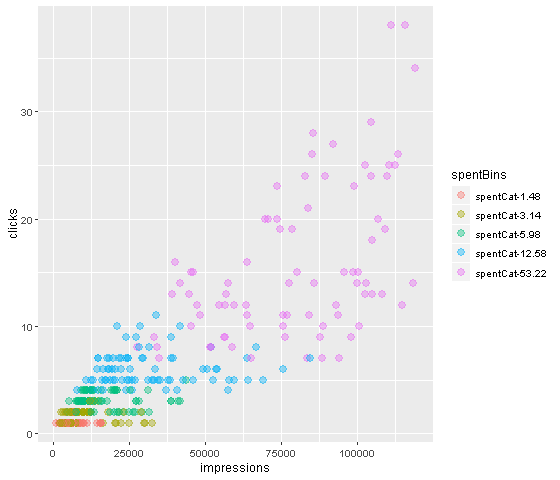

In [37]:
ggplot(data=facebookDataRed)+
    geom_point(mapping=aes(x=impressions, y=clicks, 
                           color=spentBins), size=3, alpha=.4)


`Discussion`: What do you interpret now?

`Keep in mind again - because it is important for understanding the ggplot-syntax`: Above you see that the data definition in 'ggplot()' is set global for all following geom functions. In the 'geom_point()' we see definitions of 'mapping=aes()' and an 'alpha'-value which is set outside the 'mapping' and is therefore not influenced by the data itself in opposite of the 'color' setting depending on a data variable. A fixed color can be defined outside the 'mapping' brackets.  

### Facet Plots

At the top of this notebook the [main concepts](#mainconcepts) of ggplot2 have been sketched. The general ggplot2 grammer contains the parameter &lt;FACET_FUNCTION&gt;, which will now be used in order to arrange multiple plots. 

#### Facet_wrap
One possible facet function is [`facet_wrap()`](https://ggplot2.tidyverse.org/reference/facet_wrap.html). As shown below this function creates for each possible value of the specified parameter (here: *spentBins*) a single plot. The number of plots in each row of the plot-matrix can be configured by the parameter *ncol*.

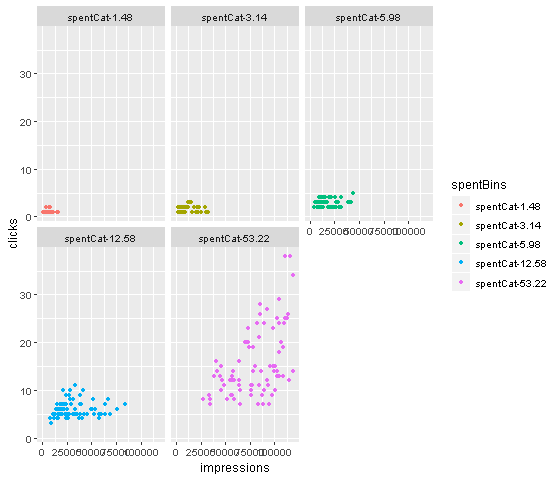

In [11]:

ggplot(data=facebookDataRed)+
    geom_point(mapping=aes(x=impressions, y=clicks, color=spentBins))+
    facet_wrap(~ spentBins ,ncol=3)



#### Facet_grid
Another widely used facet function is [`facet_grid()`](https://ggplot2.tidyverse.org/reference/facet_grid.html). This function also creates a matrix of plots. The columns of this matrix, as well as the its rows, are defined by the distinct values of variables, which can be passed to the *facet_function()* as paramters. In the example below in each plot the *last_evaluation*-value is plotted versus the *satisfaction*-value. All plots in a row belong to another value of the parameter *salary*. All plots in a column belong to another value of the parameter *left*.

Observations: 14,999
Variables: 10
$ satisfaction_level    <dbl> 0.38, 0.80, 0.11, 0.72, 0.37, 0.41, 0.10, 0.9...
$ last_evaluation       <dbl> 0.53, 0.86, 0.88, 0.87, 0.52, 0.50, 0.77, 0.8...
$ number_project        <int> 2, 5, 7, 5, 2, 2, 6, 5, 5, 2, 2, 6, 4, 2, 2, ...
$ average_montly_hours  <int> 157, 262, 272, 223, 159, 153, 247, 259, 224, ...
$ time_spend_company    <int> 3, 6, 4, 5, 3, 3, 4, 5, 5, 3, 3, 4, 5, 3, 3, ...
$ Work_accident         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ left                  <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ promotion_last_5years <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ sales                 <fct> sales, sales, sales, sales, sales, sales, sal...
$ salary                <fct> low, medium, medium, low, low, low, low, low,...


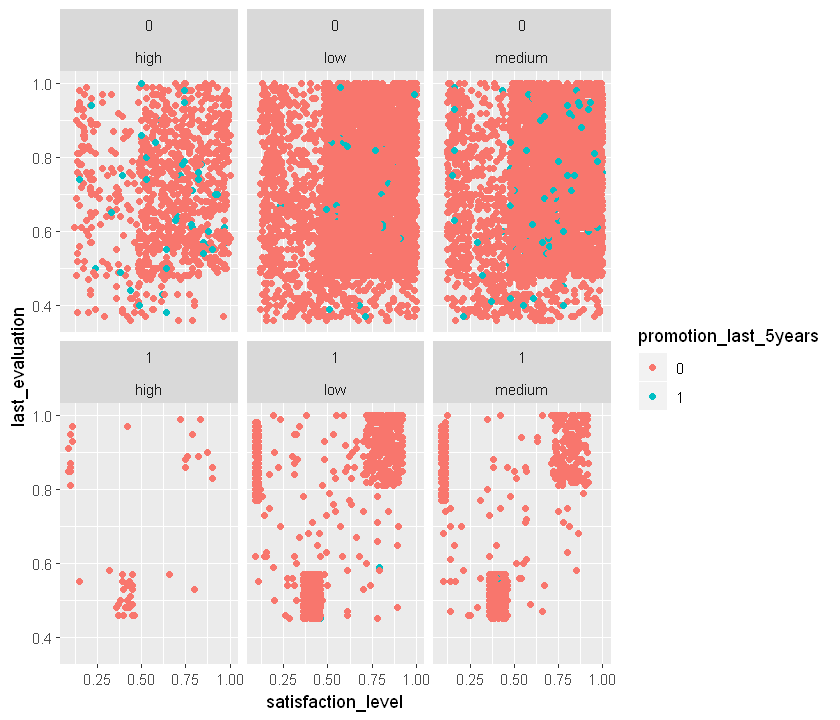

In [12]:
#Resize graphics
options(repr.plot.res = 120, repr.plot.height=6, repr.plot.width=7)  #Defaults:resolution=120,width/height=7

### Load human resource data
#[Human Resources Analytics Data] from (https://www.kaggle.com/ludobenistant/hr-analytics)

hrData <- read.csv(file="../data/humanResources.csv", header=TRUE, sep=",")

hrData$left <- factor(hrData$left)
hrData$promotion_last_5years <- factor(hrData$promotion_last_5years)

glimpse(hrData)

ggplot(data=hrData)+
    geom_point(mapping=aes(x=satisfaction_level, y=last_evaluation, 
                            color=promotion_last_5years))+
    facet_wrap(left ~ salary)


### Bar Charts

#### Bar Charts for Histograms
A histogram determines the distribution of values over a given set of bins, i.e. for each bin the number of values which fall into the bin's range are counted. Histograms are typically visualized by bar-charts.

In R bar-charts are realized by the geometric function [`geom_bar()`](http://ggplot2.tidyverse.org/reference/geom_bar.html). In contrast to other geometric functions applied so far, the '*mappings*'-parameter of *geom_bar* accepts just a single variable for the *x*-axis, which defines the bins. If a categorical variable is passed to *x*, then the discrete values of this parameter defines the bins: Each bin belongs to one value of the variable. Along the *y*-axis by default the count in each bin is plotted. 

Below we use the [`theme()`](https://ggplot2.tidyverse.org/reference/theme.html) function to control and redefine the display of all non-data elements of a plot. There are some predefined complete themes, like `theme_bw()`, `theme_grey()`, `theme_light()`, `theme_classic()` and so on at [Complete themes](https://ggplot2.tidyverse.org/reference/ggtheme.html).

In the example below for each 'age' category, the number of campaign ad's is plotted in the bar-chart.


Show Number of Campaign Ad's for Age Category is '30-34':


n
<int>
153


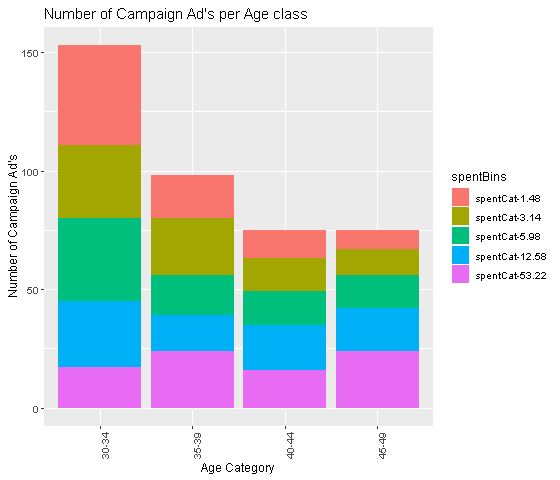

In [13]:
#Resize graphics
options(repr.plot.res = 80, repr.plot.height=6, repr.plot.width=7)  #Defaults:resolution=120,width/height=7

cat("Show Number of Campaign Ad's for Age Category is '30-34':\n")
count(facebookDataRed[facebookDataRed$age == "30-34", ])

ggplot(data = facebookDataRed) +
      geom_bar(mapping = aes(x = age, fill=spentBins))+  #We get additionally informations if we use 'spentBins' instead of 'age'
      theme(axis.text.x = element_text(angle = 90)) +
      labs(title="Number of Campaign Ad's per Age class", 
            x="Age Category", y="Number of Campaign Ad's")



Or using [`geom_histogram()`](http://ggplot2.tidyverse.org/reference/geom_histogram.html) we have to define 'x' as a continous variable which will be binned automatically.

`Discussion`: What do you interpret now?

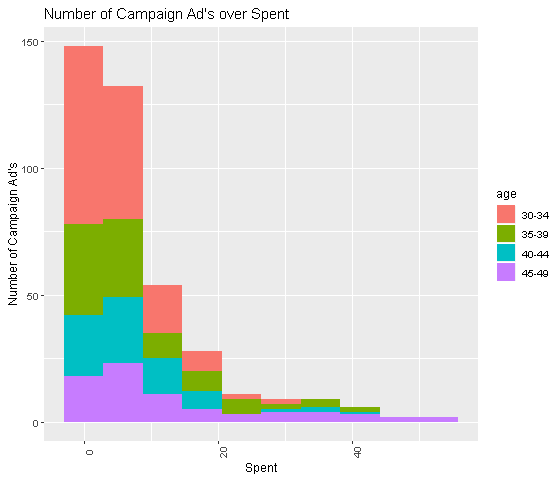

In [14]:
ggplot(data = facebookDataRed) +
      geom_histogram(mapping = aes(x = spent, fill=age), bins=10)+
      theme(axis.text.x = element_text(angle = 90)) +
      labs(title="Number of Campaign Ad's over Spent", x="Spent", y="Number of Campaign Ad's")


#### Bar charts for non-Histogram functions

Histograms are a main but not the only application of bar charts. Consider for example the case, that not the count of campaign ad's per spent category, but the total conversions per spent category shall be plotted. For this it must be possible to define a parameter which shall be plotted along the *y*-axis. In the default-setting, as applied above, this is not possible, because the *stat*-parameter in the *geom_bar*-function is set to *count* and count of elements per bin is plotted on the *y*-axis.

In order to plot an arbitrary variable along the *y*-axis the *stat*-parameter of *geom_bar()* must be set to *'identity'* as shown in the example below. The *stat*-parameter is one of the seven parameters of the [basic ggplot2-template](#mainconcepts), which is sketched at the top of this notebook. 

`Discussion`: What do you interpret now?


#Tidyverse syntax:
Observations: 20
Variables: 3
Groups: Group.spentBins [5]
$ Group.spentBins <fct> spentCat-1.48, spentCat-1.48, spentCat-1.48, spentC...
$ Group.age       <fct> 30-34, 35-39, 40-44, 45-49, 30-34, 35-39, 40-44, 45...
$ click.sum       <int> 43, 18, 14, 8, 44, 40, 26, 16, 106, 49, 48, 44, 167...


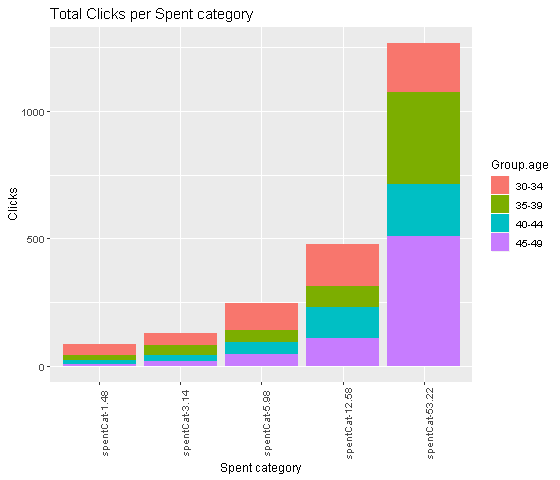

In [15]:
#Resize graphics
options(repr.plot.res = 80, repr.plot.height=6, repr.plot.width=7)  #Defaults:resolution=120,width/height=7

cat("\n#Tidyverse syntax:\n")
totalBySpentBins <- facebookDataRed %>%
        group_by(Group.spentBins = spentBins, Group.age = age) %>%
        summarise(
            click.sum = sum(clicks, na.rm = TRUE),
        )   


#totalBySpentBins$Group.spentBins
#totalBySpentBins$click.sum

glimpse(totalBySpentBins)

ggplot(data = totalBySpentBins)+
    geom_bar(mapping = aes(x = Group.spentBins ,y=click.sum,
                           fill=Group.age), stat="identity")+
    theme(axis.text.x = element_text(angle = 90))+
    labs(title="Total Clicks per Spent category", 
         x="Spent category", y="Clicks")




<BR><font color=red>
>>> Bis hier durchgearbeitet!
</font><font color=black>

The same plot as above can also be generated by the geometric function [`geom_col()`](https://ggplot2.tidyverse.org/reference/geom_bar.html). This function is basically the same as *geom_bar()*, but with another *'identity* as the default setting for the *stat*-parameter:   

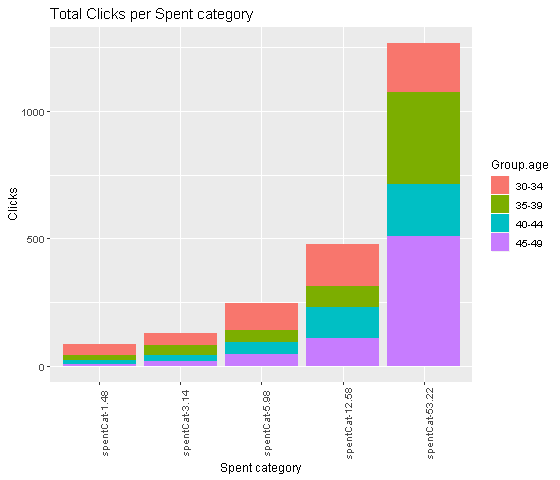

In [16]:

ggplot(data = totalBySpentBins)+
    geom_col(mapping = aes(x = Group.spentBins ,y=click.sum,
                           fill=Group.age))+
    theme(axis.text.x = element_text(angle = 90))+
    labs(title="Total Clicks per Spent category", 
         x="Spent category", y="Clicks")

#### Position Adjustments in Bar Charts

The plot below visualizes the number of 'total_conversion' per 'spent' category:

Show Number of Campaign Ad's for 'total_conversion' is 1:


n
<int>
323


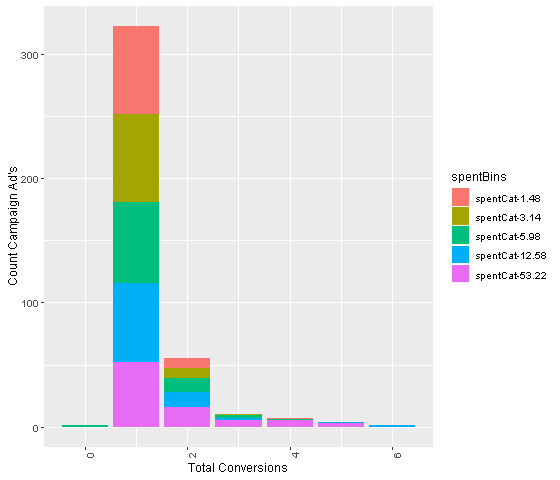

In [17]:
ggplot(data = facebookDataRed) +
    geom_bar(mapping = aes(x = total_conversion, fill=spentBins))+ 
    theme(axis.text.x = element_text(angle = 90))+
    labs(x="Total Conversions", y="Count Campaign Ad's")

cat("Show Number of Campaign Ad's for 'total_conversion' is 1:\n")
count(facebookDataRed[facebookDataRed$total_conversion == 1, ])


For the plot above the *position*-parameter of *geom_bar()* has not been assigned explicitly. This means, that the default value is applied, which is *'stack'*. However, this parameter, which also belongs to the [basic ggplot2-template parameters](#mainconcepts), can be also set to *'fill'* or *'dodge'*. The corresponding results are shown in the cells below. 

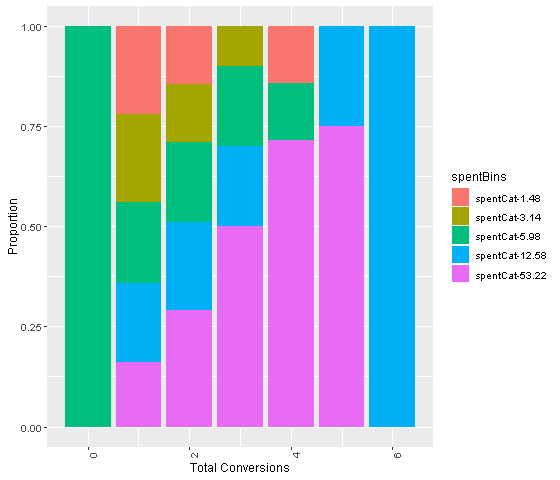

In [18]:
ggplot(data = facebookDataRed) +
    geom_bar(mapping = aes(x = total_conversion, fill=spentBins), position="fill")+ 
    theme(axis.text.x = element_text(angle = 90))+ 
    labs(x="Total Conversions", y="Proportion")


Demonstrate the option *position='dodge'*: 

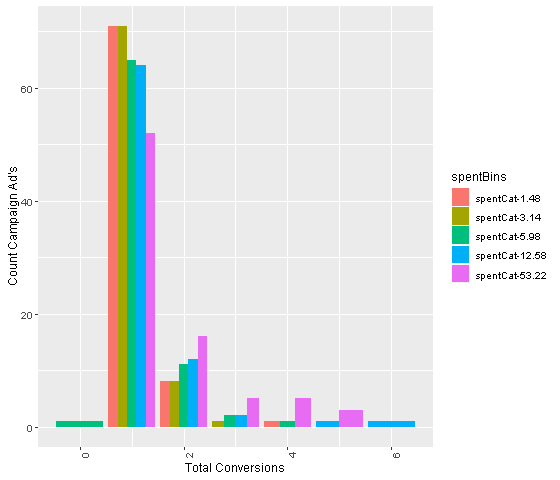

In [19]:
ggplot(data = facebookDataRed) +
    geom_bar(mapping = aes(x = total_conversion, fill=spentBins), position="dodge")+ 
    theme(axis.text.x = element_text(angle = 90))+
    labs(x="Total Conversions", y="Count Campaign Ad's")


#### Coordinate Systems
ggplot2 provides different coordinate systems. Up to now only the default &lt;COORDINATE_FUNCTION&gt;, which is the  **Cartesian** coordinate system has been applied. Note that &lt;COORDINATE_FUNCTION&gt; is another parameter of the [basic ggplot2-template](#mainconcepts).

Sometimes, plots become clearer if the *x-* and *y-* axis are switched. This can be accomplished by the coordinate function [`coord_flip()`](https://ggplot2.tidyverse.org/reference/coord_flip.html): 

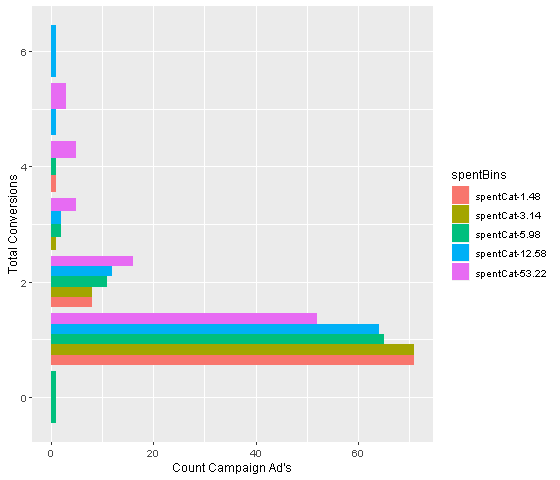

In [20]:
ggplot(data = facebookDataRed) +
    geom_bar(mapping = aes(x = total_conversion, fill=spentBins), position="dodge")+ 
    coord_flip()+
    labs(x="Total Conversions", y="Count Campaign Ad's")


Another coordinate function is *coord_polar()*: 

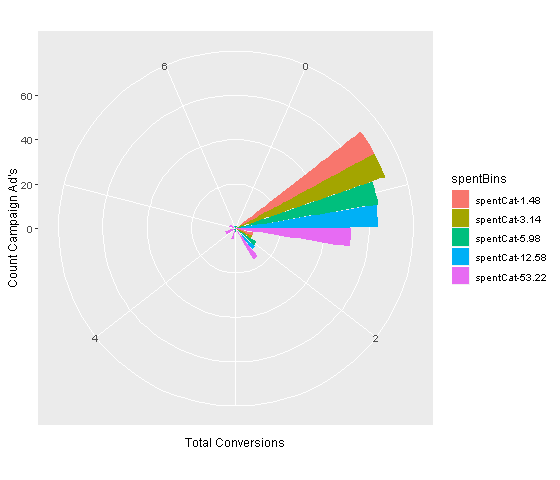

In [21]:
ggplot(data = facebookDataRed) +
    geom_bar(mapping = aes(x = total_conversion, fill=spentBins), position="dodge")+ 
    coord_polar()+
    labs(x="Total Conversions", y="Count Campaign Ad's")


### Box Plots

`Keep in mind:` In the figure below you see the explanation of a boxplot in R. The minimum and maximum value are without outliers. Outliers are calculated as values which are more than 1.5 times the *Interquartile Range (IQR)* below or above the box. The **Interquartile Range (IQR)** is calculated as subtraction of the first quartile from the third quartile [WD17].

Remember:<BR>
1 quartile = 0.25 quantile = 25 percentile<BR>
2 quartile = 0.50 quantile = 50 percentile (known as median)<BR>
3 quartile = 0.75 quantile = 75 percentile<BR>
...<BR>


Further explanation in section *Feature Engineering*.

<html><img src="../img/boxplot1.jpg", width=500></html>
<font size="1">(Imagesource: OK)</font>

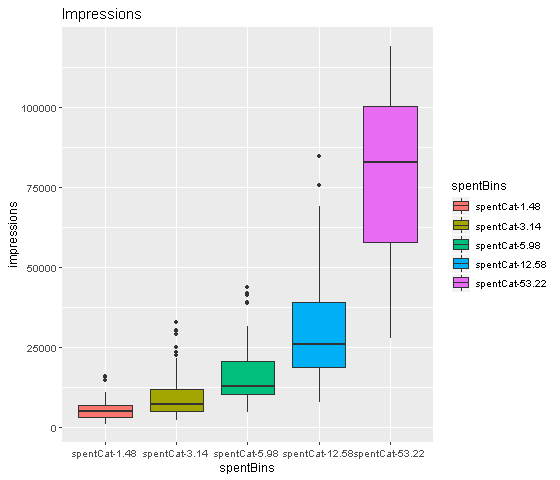

In [22]:
ggplot(data = facebookDataRed) + 
    geom_boxplot(mapping=aes(x=spentBins, y=impressions, fill=spentBins))+   #Change to 'fill=age'
    labs(title="Impressions")


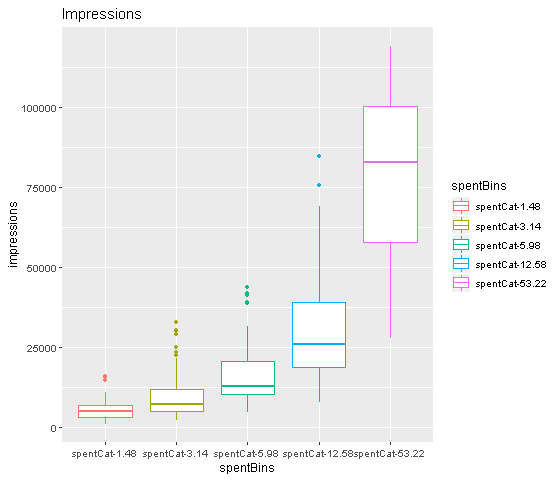

In [23]:
ggplot(data = facebookDataRed) + 
    geom_boxplot(mapping=aes(x=spentBins, y=impressions, color=spentBins))+  #Change to 'fill=age'
    labs(title="Impressions")

### Density plots

A density plot shows us the distribution of data related to our setting. 

Look at the plot below: Below, it tells us that "impressions" of 12500 (the highest peak in the plot) provide nearly 0.17% of the times for spents in the category "spentCat-1.48".

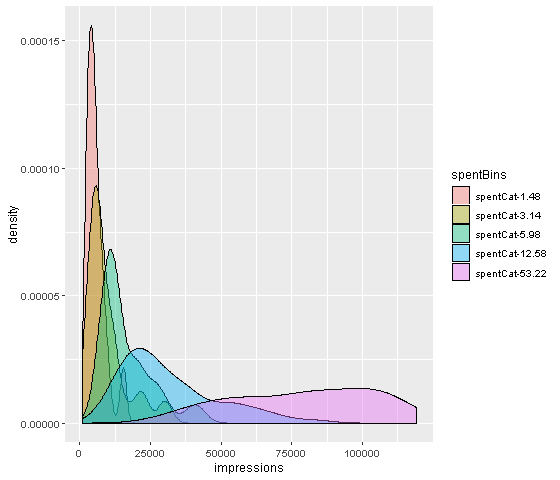

In [24]:
ggplot(data = facebookDataRed) + 
    geom_density(mapping=aes(x=impressions, fill=spentBins), alpha=.4)
    #+ facet_wrap(~ gender ,ncol=1)


Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."

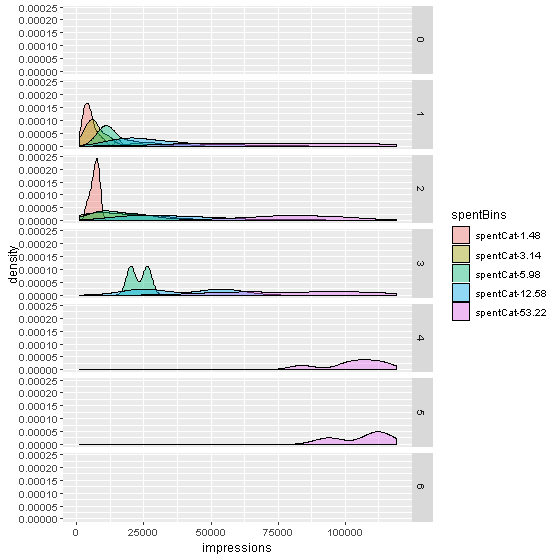

In [25]:
#Resize graphics
options(repr.plot.res = 300, repr.plot.height=7, repr.plot.width=7)  #Defaults:resolution=120,width/height=7

ggplot(data = facebookDataRed) + 
    geom_density(mapping=aes(x=impressions, fill=spentBins), alpha=.4)+ 
    facet_grid(total_conversion~.)   #The 'total_conversion' see you right side at the grey margin

#Resize graphics
options(repr.plot.res = 80, repr.plot.height=6, repr.plot.width=7)  #Defaults:resolution=120,width/height=7

### Additionally calculate frequencies

With [`xtabs()`](https://www.rdocumentation.org/packages/BiocGenerics/versions/0.18.0/topics/xtabs) creates a contingency table from cross-classifying factors. Below you see the numbers of campaign ad's related to the cross-classifying factors "total_conversion" from 0 to 6 and the spent categories - discussed above.



In [26]:
mytable <- xtabs(~ spentBins + total_conversion, data=facebookDataRed)
mytable


cat("Show Number of Campaign Ad's for 'total_conversion' is 1 and Spent Category is 'spentCat-5.98':\n")
count(facebookDataRed[facebookDataRed$total_conversion == 1 & facebookDataRed$spentBins == "spentCat-5.98", ])

                total_conversion
spentBins         0  1  2  3  4  5  6
  spentCat-1.48   0 71  8  0  1  0  0
  spentCat-3.14   0 71  8  1  0  0  0
  spentCat-5.98   1 65 11  2  1  0  0
  spentCat-12.58  0 64 12  2  0  1  1
  spentCat-53.22  0 52 16  5  5  3  0
  spentCat-NA     0  0  0  0  0  0  0

Show Number of Campaign Ad's for 'total_conversion' is 1 and Spent Category is 'spentCat-5.98':


n
<int>
65


### Statistical Summary

With [`stat_summary()`](https://ggplot2.tidyverse.org/reference/stat_summary.html) we can execute different summary functions and plot the results.


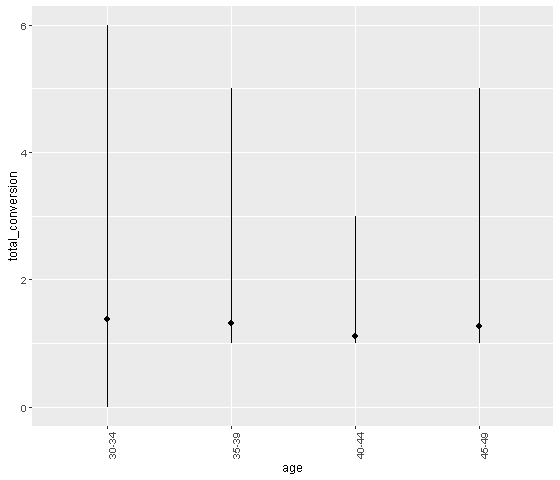

In [27]:
ggplot(data = facebookDataRed) +
  stat_summary(
    mapping = aes(x = age, y = total_conversion),  #With 'color=spentBins' you can nothing see
    fun.ymin = min,    #That's the line down
    fun.ymax = max,    #That's the line up
    fun.y = mean       #That's the point in the line
  )+
  theme(axis.text.x = element_text(angle = 90))



### Arrange ggplot's side by side and some problems with `aes()`

We use the function [`grid.arrange()`](https://stat545.com/multiple-plots.html) in the [gridExtra](https://cran.r-project.org/web/packages/gridExtra/index.html) package to combine multiple plots - see also [Laying out multiple plots on a page](https://cran.r-project.org/web/packages/egg/vignettes/Ecosystem.html).
 
`Important`: If you try to access a data frame column, whoose name is stored in a variable, by `aes()` function, it is mostly not possible. So it is better to use [`aes_string()`](https://www.rdocumentation.org/packages/ggplot2/versions/1.0.0/topics/aes_string) with string/quoted objects. `aes()` uses a non-standard evaluation to get the variable names and therefore sometimes you get into trouble. Look at our example below.

Additionally we use [`do_call()`](https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/do.call) to pass a function with arguments - it is like `lapply()`:

* 'what' defines the function to call
* 'args' defines a list of arguments to the function call and so we can pass a variable list
    


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



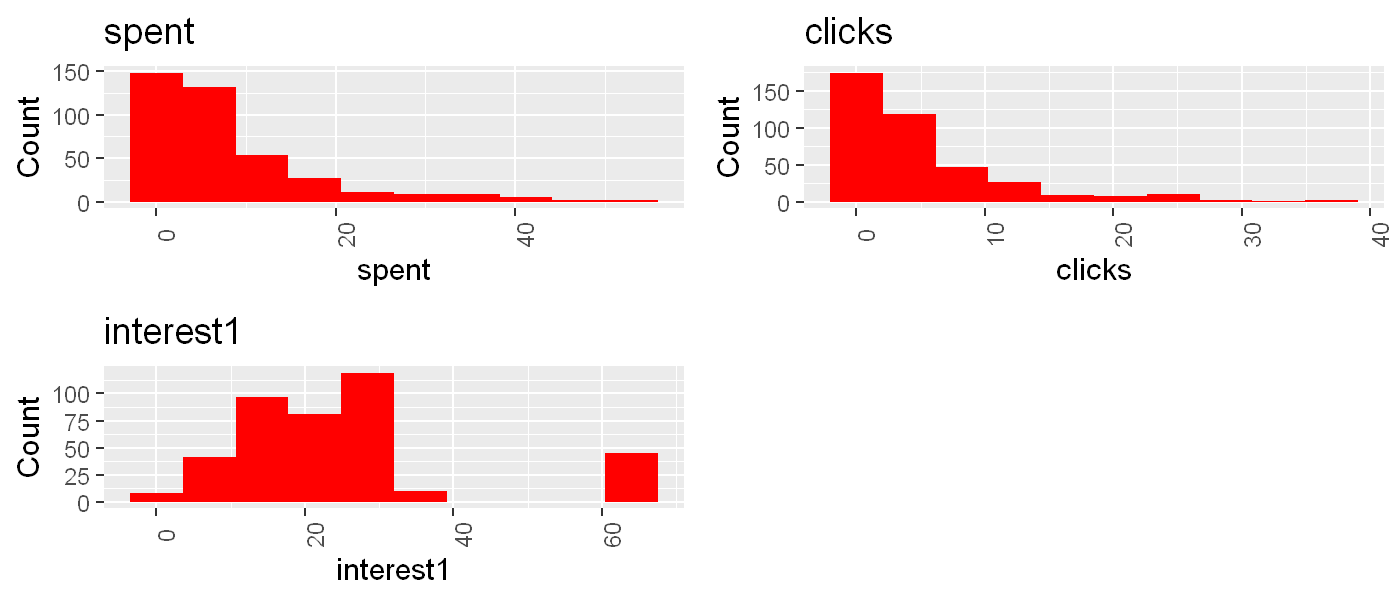

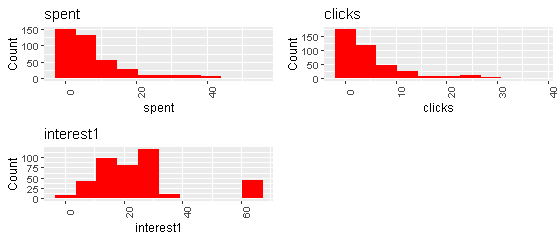

In [28]:
#install.packages("gridExtra")
library(gridExtra)

df <- facebookDataRed

#Resize graphics
options(repr.plot.res = 200, repr.plot.height=3, repr.plot.width=7)  #Defaults:resolution=120,width/height=7

plots <- list()
df.cols <- c("spent", "clicks", "interest1")
nDraws <- length(df.cols)

for (i in 1:nDraws) {
    nVar <- df.cols[i]
    
    #Does not work:
    #   ...aes(x = df[, nVar], ...)
    #   ...aes(x = df[, c(nVar)], ...)
    
    #Does work:
    #   ...aes(x = df[, 1], ...)
    #   ...aes_string(x = df[, c(nVar)], ...)

    plots[[length(plots)+1]] <- ggplot() +
          geom_histogram(mapping = aes_string(x = df[, c(nVar)]), bins=10, fill="red") +
          theme(axis.text.x = element_text(angle = 90)) +
          labs(title=nVar, x=nVar, y="Count")
    
}

#Show all created plots
do.call("grid.arrange", c(plots, ncol=2))

#By hand:
grid.arrange(plots[[1]], plots[[2]], plots[[3]], ncol=2)


#Resize graphics
options(repr.plot.res = 80, repr.plot.height=6, repr.plot.width=7)  #Defaults:resolution=120,width/height=7


### Labels for the axes, title and legend and ranges for x/y-axes by hand

As we have seen, we can assign colors manually or automatically. For color concepts and detailled informations, look at [Colors (ggplot2)](http://www.cookbook-r.com/Graphs/Colors_(ggplot2)).

Because sometimes it is confusing with axes and legends, we will do some experiments below.

`Keep in mind`: Below we have not defined the data in *ggplot()*, but in the *geom functions* themselves. The 'x' values must have the same length.



If you want to assign a color with legend entry manually, then it is a good way to assign unique color identifier which reference to the defined color in legends. You see below the assignment color="mycol1" and the according color in values of legend:

Min ( 1 )/ Max ( 38 )of clicks:
Min ( 0.24 )/ Max ( 53.22 )of spent:


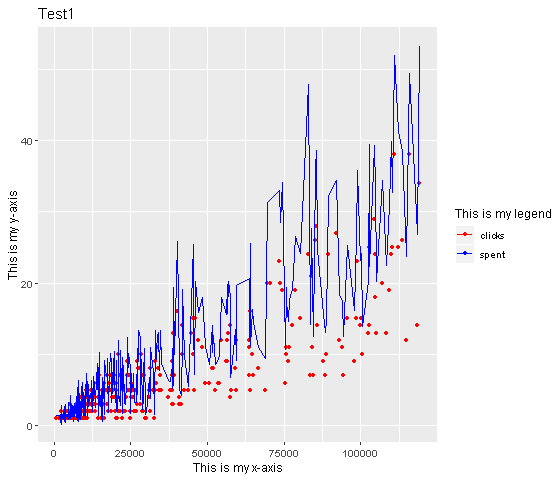

In [29]:

cat("Min (",min(facebookDataRed$clicks),")/ Max (", max(facebookDataRed$clicks), ")of clicks:\n")
cat("Min (",min(facebookDataRed$spent),")/ Max (", max(facebookDataRed$spent), ")of spent:\n")

ggplot() + 
    geom_point(mapping=aes(x = facebookDataRed$impressions, 
                           y = facebookDataRed$clicks, color="mycol1")) +
    geom_line(mapping=aes(x = facebookDataRed$impressions, 
                          y = facebookDataRed$spent, color="mycol2")) +
    ggtitle("Test1") +
    xlab("This is my x-axis") + ylab("This is my y-axis") + 
    scale_color_manual(name = "This is my legend", 
                     labels = c("clicks", "spent"), 
                     values = c("mycol1" = "red", "mycol2" = "blue"))


#We can do that concept also with 'linetype' and 'size' - see lecture "Regularization"
#  scale_linetype_manual("Line-Types", values=c("lm-model"=2, "lambda-model"=1)) +
#  scale_size_manual("Size-Types", values=c("lm-model"=1, "Data"=2, "lambda-model"=0.3))



Look at the inside and outside the 'mapping=aes()' parameter defined color. Below, we change the outside 'color' parameter to "green" and overwrite the inside settings:


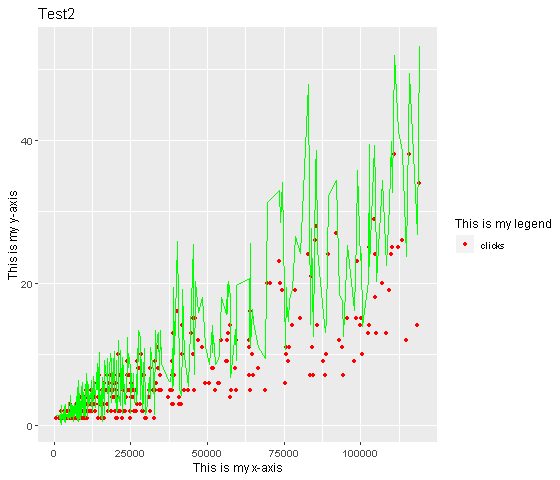

In [30]:
ggplot() + 
    geom_point(mapping=aes(x = facebookDataRed$impressions, 
                           y = facebookDataRed$clicks, color="mycol1")) +
    geom_line(mapping=aes(x = facebookDataRed$impressions, 
                          y = facebookDataRed$spent, color="mycol2"), color="green") +
    ggtitle("Test2") +
    xlab("This is my x-axis") + ylab("This is my y-axis") + 
    scale_color_manual(name = "This is my legend", 
                     labels = c("clicks", "spent"), 
                     values = c("mycol1" = "red", "mycol2" = "blue"))


Next plot only look for the sequence of colors and can become problematically:

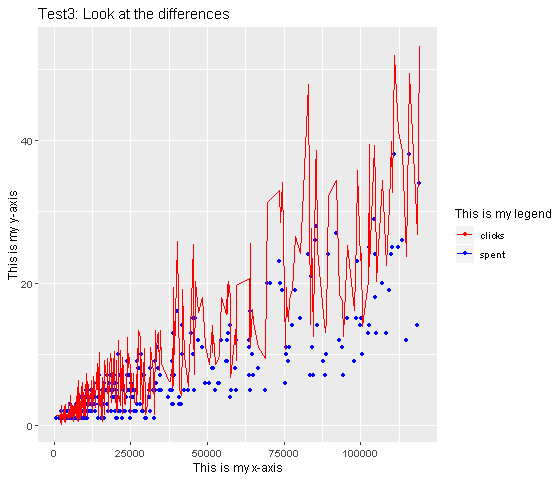

In [31]:
ggplot() + 
    geom_point(mapping=aes(x = facebookDataRed$impressions, 
                           y = facebookDataRed$clicks, color="x2")) +   
    geom_line(mapping=aes(x = facebookDataRed$impressions, 
                          y = facebookDataRed$spent, color="x1") ) +   
    ggtitle("Test3: Look at the differences") +
    xlab("This is my x-axis") + ylab("This is my y-axis") + 
    scale_color_manual(name = "This is my legend", 
                     labels = c("clicks", "spent"), 
                     values = c("red", "blue"))


The next plots only look for the sequence of colors and define the colors outside the 'mapping=aes()' parameter. This also can become problematically:

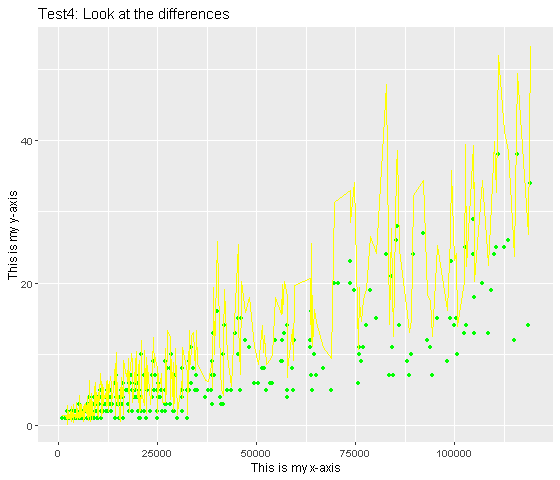

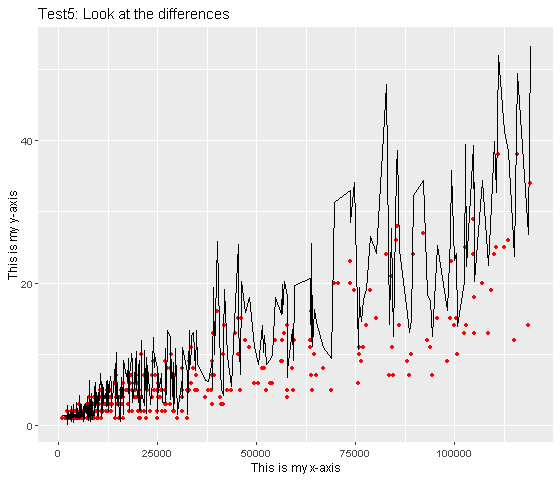

In [32]:
ggplot() + 
    geom_point(mapping=aes(x = facebookDataRed$impressions, 
                           y = facebookDataRed$clicks), color="green") +   # change color position
    geom_line(mapping=aes(x = facebookDataRed$impressions, 
                          y = facebookDataRed$spent), color="yellow" ) +  # does not match with legend
    ggtitle("Test4: Look at the differences") +
    xlab("This is my x-axis") + ylab("This is my y-axis") + 
    scale_color_manual(name = "This is my legend", 
                     labels = c("clicks", "spent"), 
                     values = c("red", "blue"))


ggplot() + 
    geom_point(mapping=aes(x = facebookDataRed$impressions, 
                           y = facebookDataRed$clicks), color="2") +  
    geom_line(mapping=aes(x = facebookDataRed$impressions, 
                          y = facebookDataRed$spent), color="1" ) +   
    ggtitle("Test5: Look at the differences") +
    xlab("This is my x-axis") + ylab("This is my y-axis") + 
    scale_color_manual(name = "This is my legend", 
                     labels = c("clicks", "spent"), 
                     values = c("yellow", "green"))



Below, the plot includes limits for the x- and y-axis:

Warning message:
"Removed 388 rows containing missing values (geom_point)."Warning message:
"Removed 282 rows containing missing values (geom_path)."

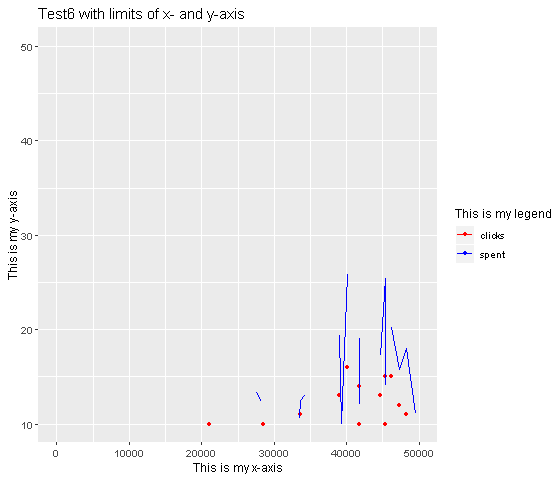

In [33]:

ggplot() + 
    geom_point(mapping=aes(x = facebookDataRed$impressions, y = facebookDataRed$clicks, color="mycol1")) +
    geom_line(mapping=aes(x = facebookDataRed$impressions, y = facebookDataRed$spent, color="mycol2") ) +
    xlim(0, 50000) + ylim(10, 50) +
    ggtitle("Test6 with limits of x- and y-axis") +
    xlab("This is my x-axis") + ylab("This is my y-axis") + 
    scale_color_manual(name = "This is my legend", 
                     labels = c("clicks", "spent"), 
                     values = c("mycol1"="red", "mycol2"="blue"))

### `Discussion:` What is the better visualization system? Base R or ggplot?

In *Base R Graphics* you can almost do all things that you can do in *ggplot()*, maybe not so complex graphics and maybe not so nice looking. *ggplot()* is the modern way to visualize data in R. Look at [Comparing ggplot2 and R Base Graphics](https://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/). We will see more complex visualisations in our upcoming Machine Learning lectures.



## Exercises

[Exercise on visualisation in R](../exercises/Ass08VisualisationR.ipynb)